# Explore here

In [2]:
import pandas as pd

df = pd.read_csv('/workspaces/machine-learning-python-template/data/raw/data.csv')
df

/tmp/ipykernel_3049/2872880502.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


df.info()

In [3]:
df.shape

(48895, 16)

In [4]:
repeatedhouses = df["id"].duplicated().sum()
print('Number of repeated houses is ' + str(repeatedhouses))
repeatedhosts = df['host_id'].duplicated().sum()
print('Number of repeated hosts is ' + str(repeatedhosts))


Number of repeated houses is 0
Number of repeated hosts is 11438


There are no repeated houses, tbut there are 11438 hosts that own at least two houses

In [5]:
drops = ['id', 'host_id', 'name', 'host_name', 'neighbourhood', 'last_review']
df = df.drop(drops, axis=1)
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


Because no houses are repeated, we can drop the id, the name of the ad is not relevant and the name of the house neither. 

Univariate Categorical analysis:

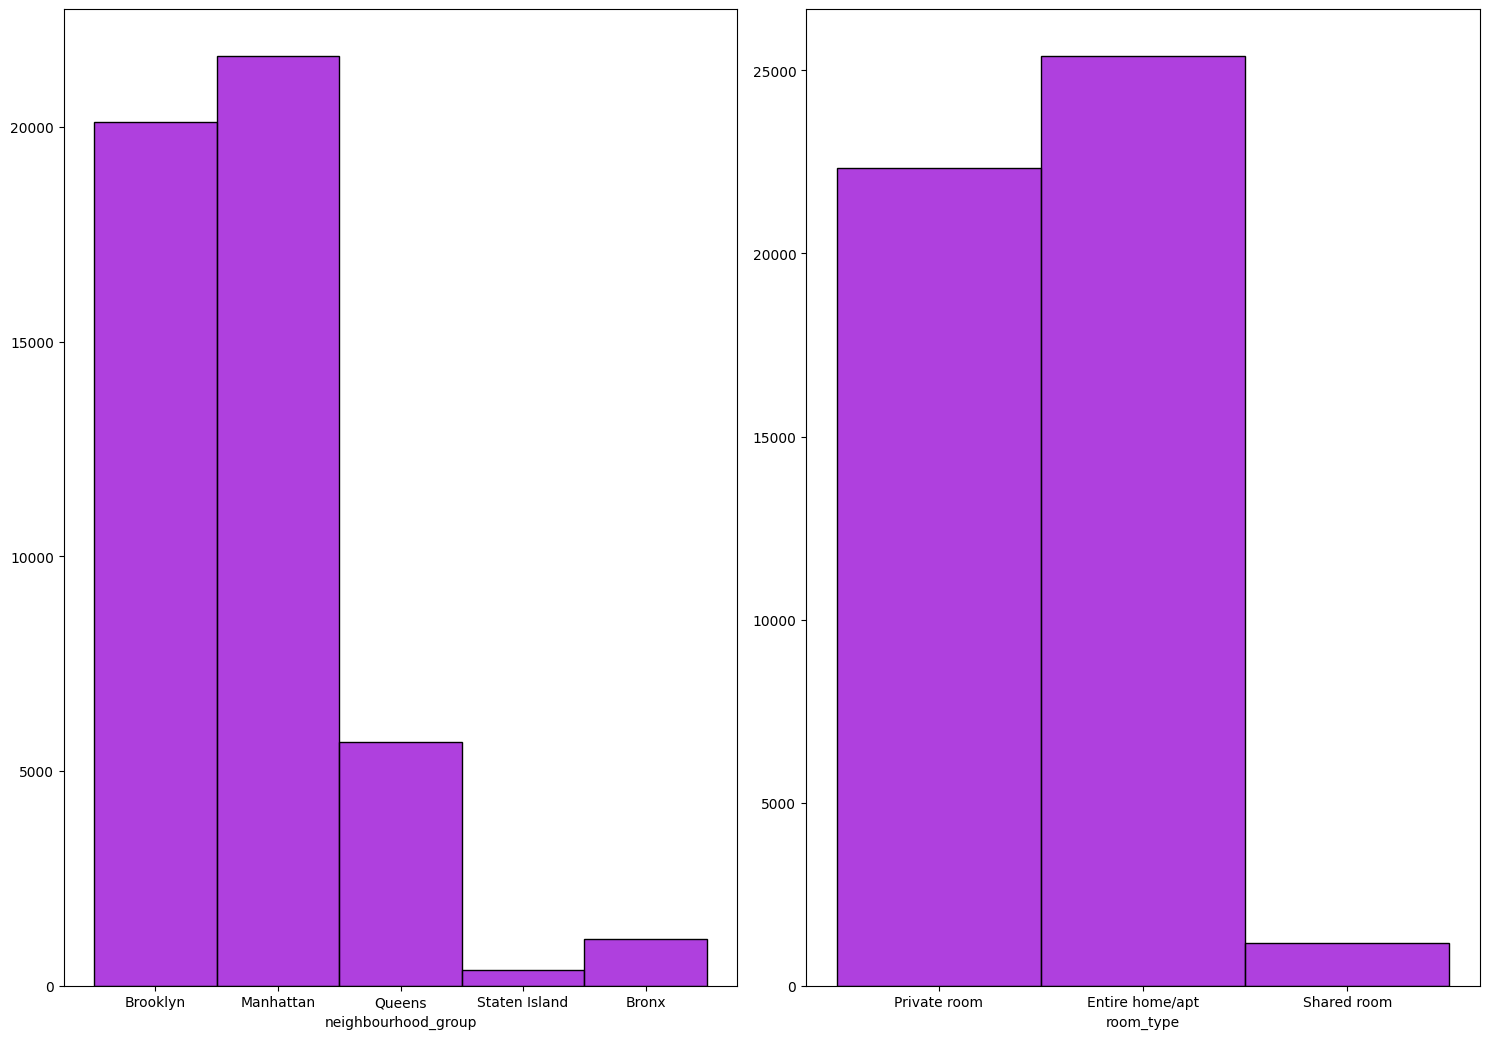

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 2, figsize = (15, 10.5))


cols = ['neighbourhood_group', 'room_type']

for col, ax in zip(cols, axis.ravel()): 
    sns.histplot(ax = ax, data = df, x = col, color = 'darkviolet').set(ylabel = None)



plt.tight_layout()


plt.show()

The neighbourhood groups where there are more houses for rent is Manhattan, and the one with the less is Staten Island.  The most common room type is the entire home, followed closely by the private room. 


Univariate Numerical analysis:

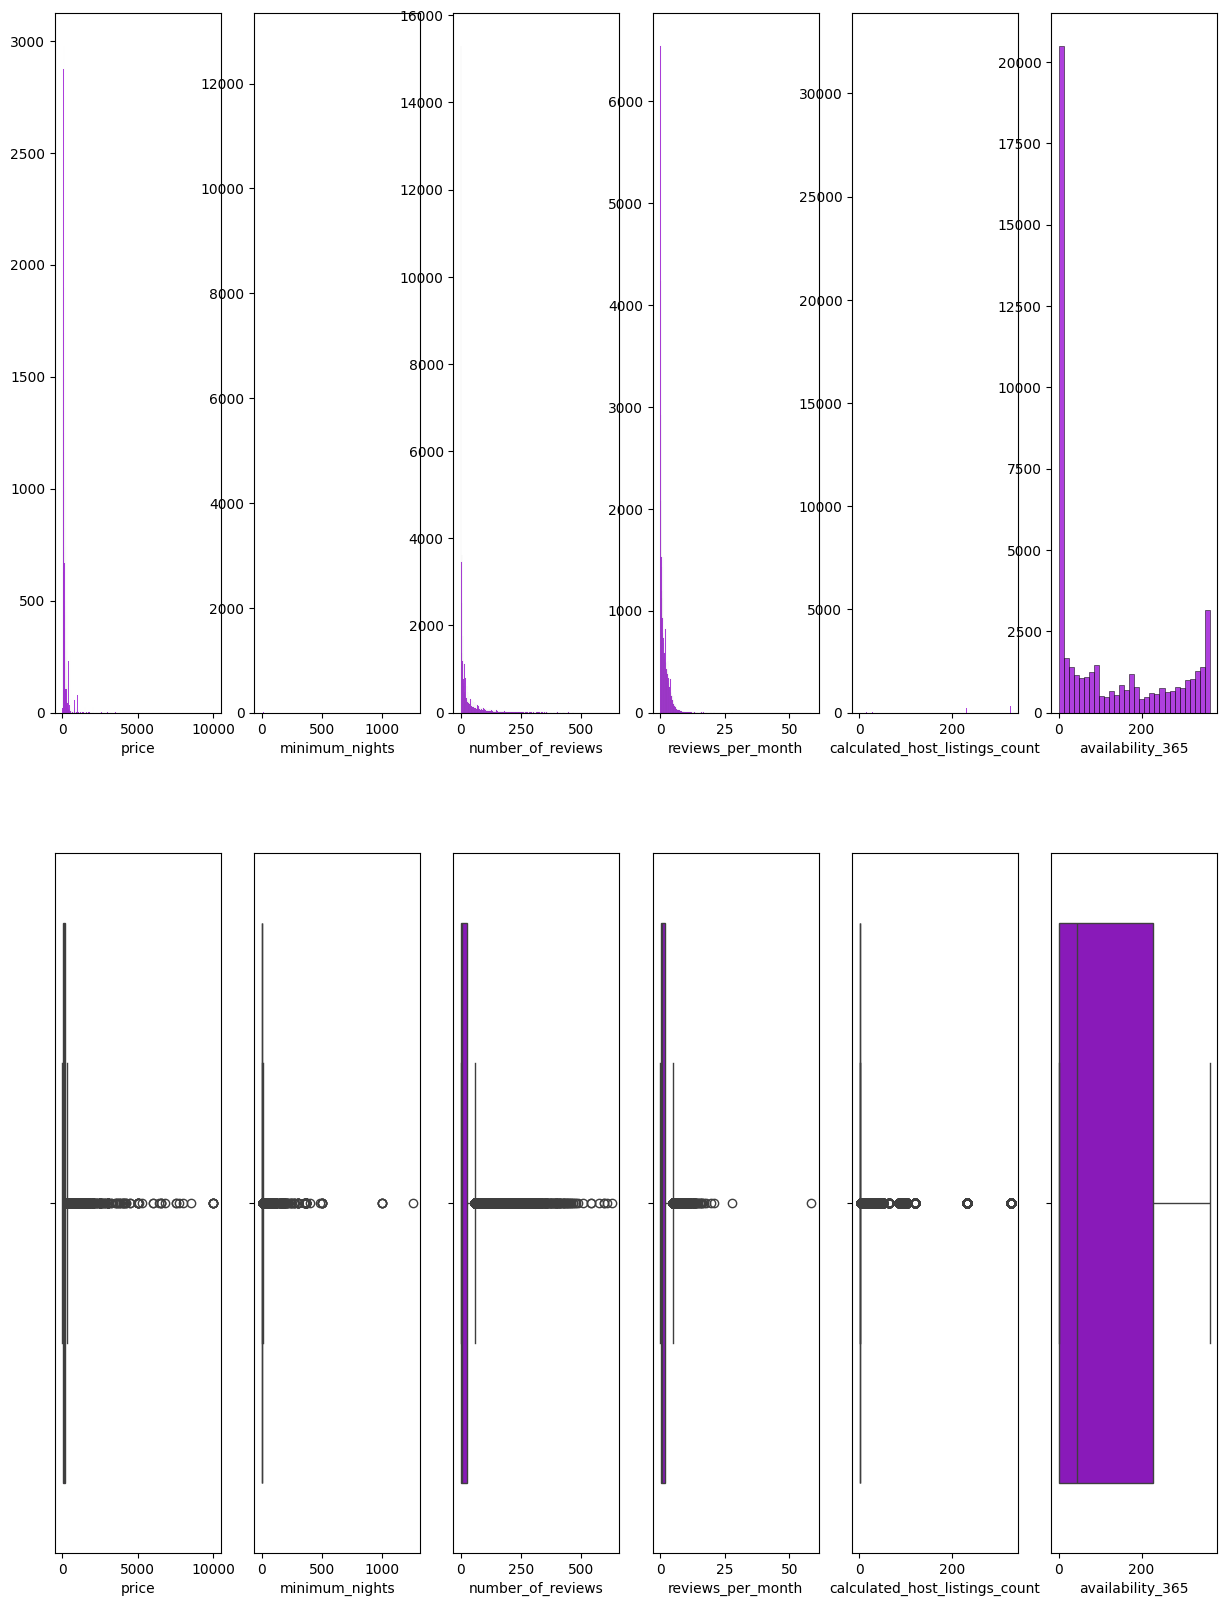

In [7]:
fig, axis = plt.subplots(2, 6, figsize = (15, 20))

cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

for i, col in enumerate(cols):
    sns.histplot(ax=axis[0, i], data=df, x=col, color='darkviolet').set(ylabel=None)
    sns.boxplot(ax=axis[1, i], data=df, x=col, color='darkviolet')



plt.show()

No voy a comentar, no se ve nada :)


Multivariate numerical-numerical analysis:

I am going to compare the price to different numerical variables

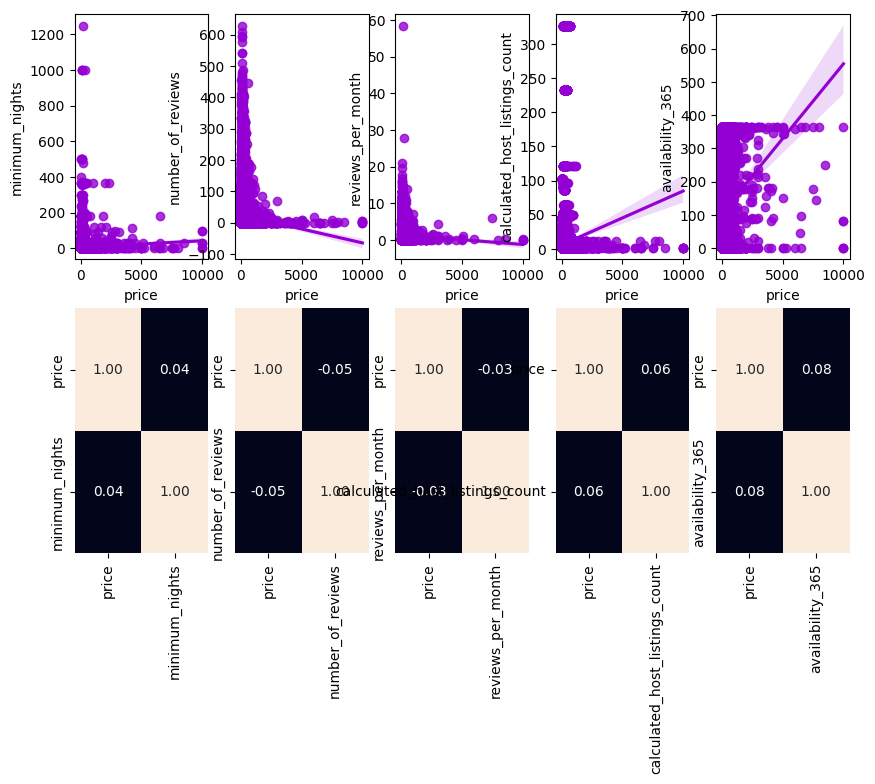

In [8]:
fig, axis = plt.subplots(2, 5, figsize = (10, 7))

x_data = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

for i, col in enumerate(x_data):
    sns.regplot(ax = axis[0, i], data = df, x = "price", y = col, color = 'darkviolet')
    sns.heatmap(df[["price", col]].corr(), annot = True, fmt = ".2f", ax = axis[1, i], cbar = False)





plt.show()

Out of the 5 variablies studied in this step, only three of them (minimum nights, host listings count and 365 availability) have a positive relationship with the price, whereas the other two have a negative relationship.

Nevertheless, all of them are very close to 0, meaning that the relationship is very weak to even be considered. 

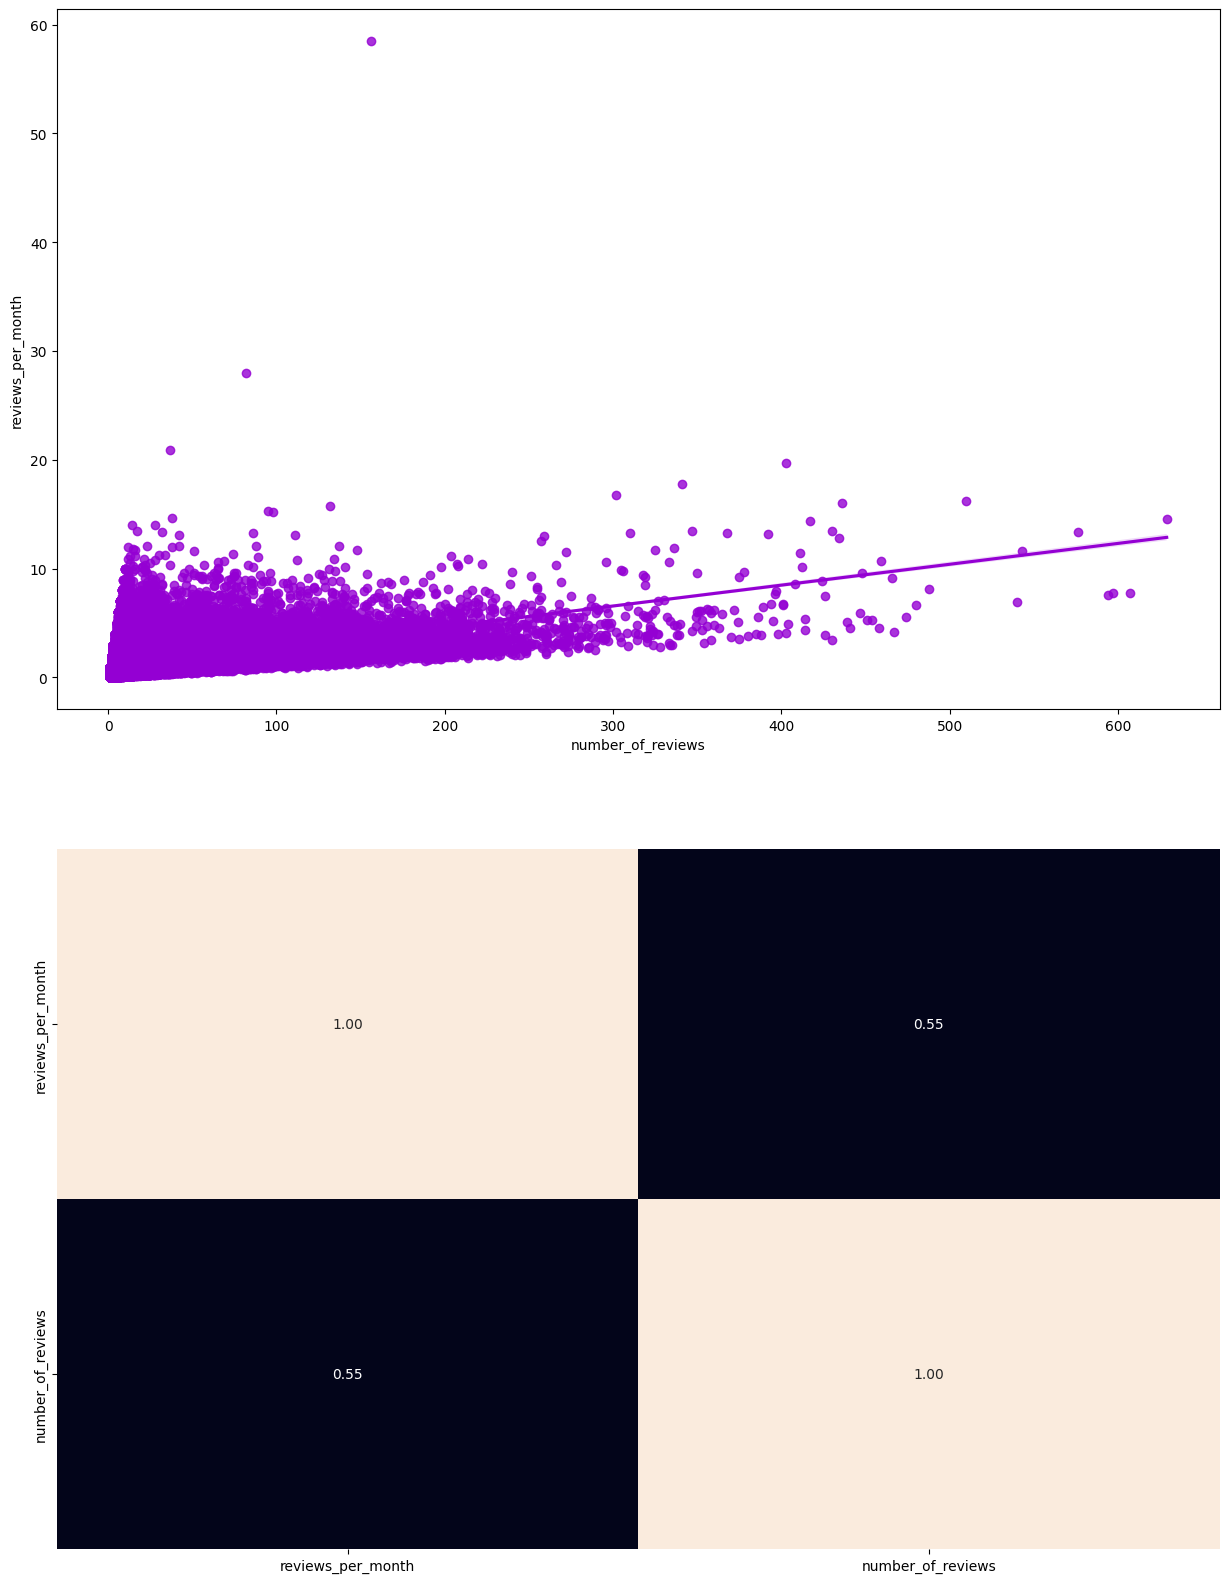

In [9]:

fig, axis = plt.subplots(2, 1, figsize = (15, 20))

sns.regplot(ax = axis[0], data = df, x = "number_of_reviews", y = 'reviews_per_month', color = 'darkviolet')
sns.heatmap(df[["reviews_per_month", 'number_of_reviews']].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)


plt.show()

We can see here that there is a good positive relationship between the number of reviews a post has an the number of reviews it receives per month. This is kind of expected, as the higher the number of reviews, the more likely it is that those reviews will be spread accross different months. However, we can see an outlier at reviews per month = 60. This is quite strange, as no month has more than 30 nights, and each apartment/room needs to be booked for at least one hour, so it might be due to an error. 

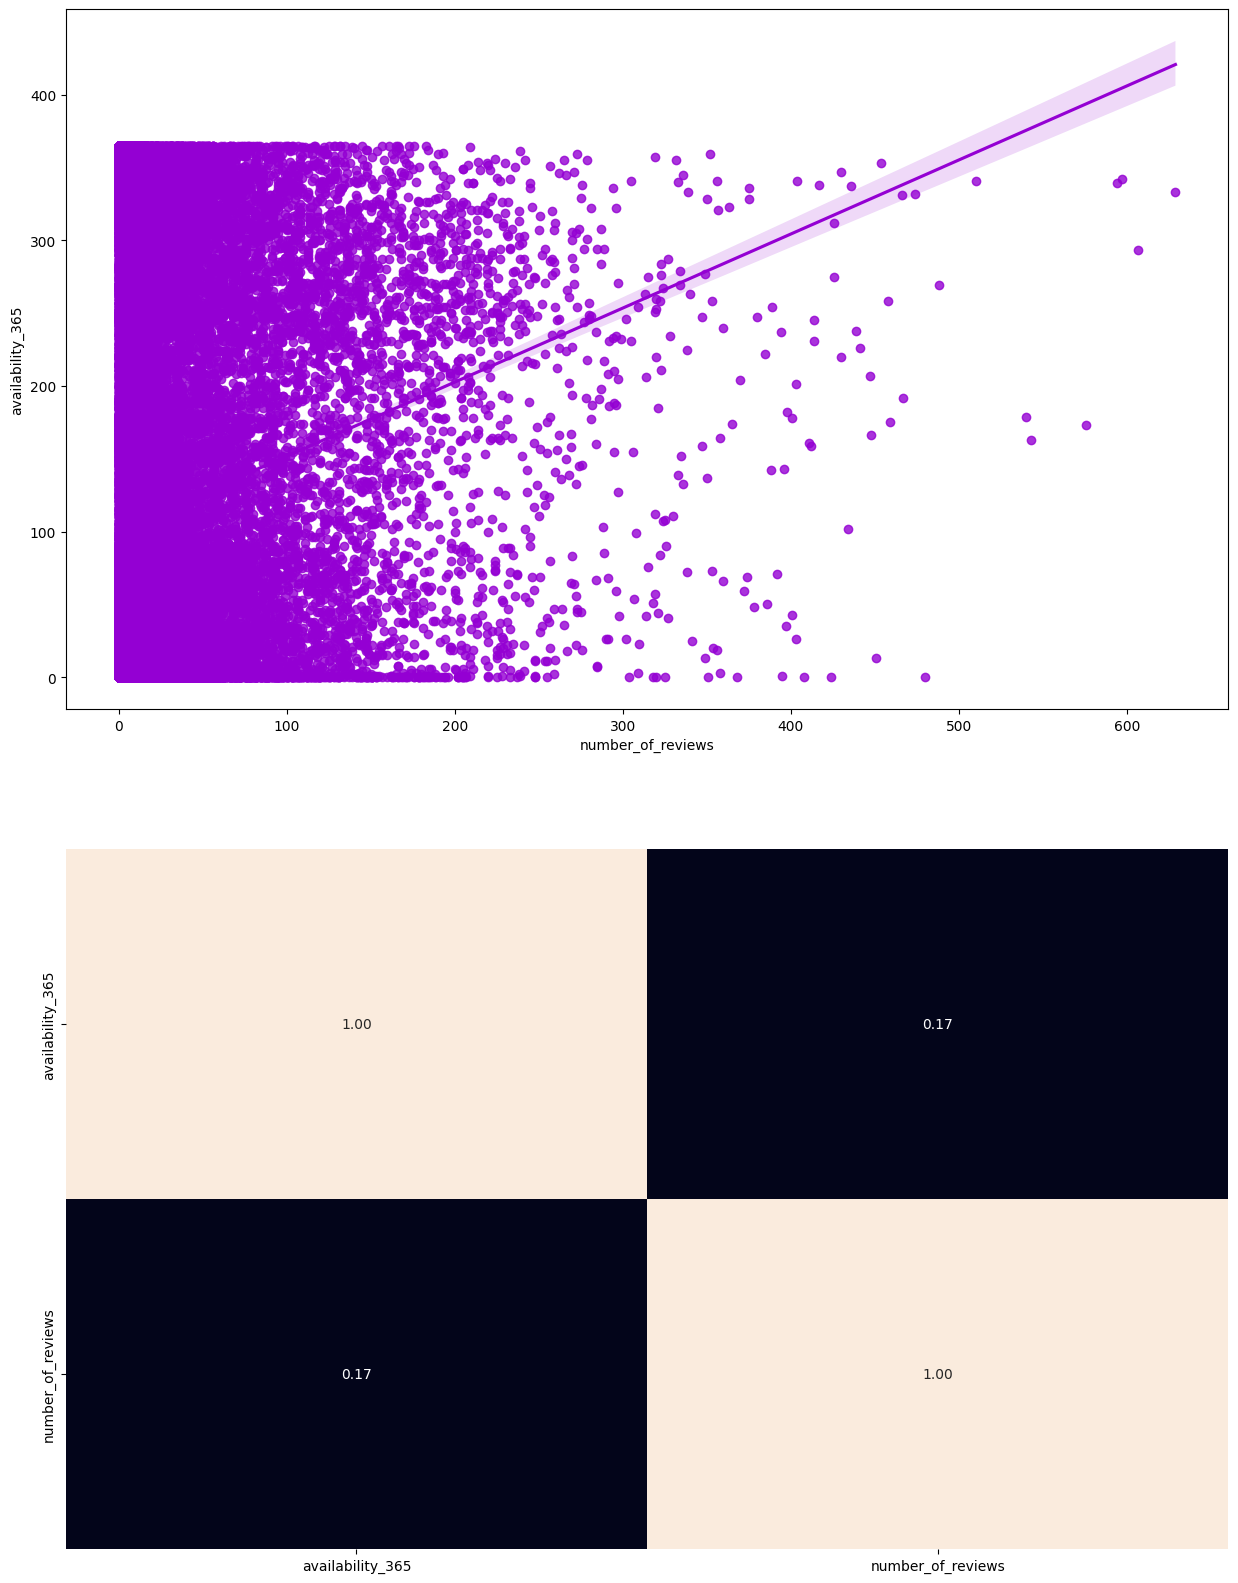

In [10]:
fig, axis = plt.subplots(2, 1, figsize = (15, 20))

sns.regplot(ax = axis[0], data = df, x = "number_of_reviews", y = 'availability_365', color = 'darkviolet')
sns.heatmap(df[["availability_365", 'number_of_reviews']].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)


plt.show()

There is a positive, slightly weak, linear relationship between the number of reviews and the 365 availability. Probabily because the more days the apartment/room is available, the more chances of being booked often and therefore the more chances of getting reviews. 

import folium
import statistics as stats
import branca.colormap as cm

latmedian = stats.median(df['latitude'])
lonmedian = stats.median(df['longitude'])

colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow'], vmin=min(df['price']), vmax=max(df['price']))

m = folium.Map(location=[latmedian, lonmedian], zoom_start=10)

for i in range(len(df)):
    folium.Circle(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        radius=10,
        fill=True,
        color=colormap(df.iloc[i]['price']),
        fill_opacity=0.2
    ).add_to(m)

m.add_child(colormap)

m

We can see here that the maximum price is 10,000 dollars. However, this is not representative of most prices. Therefore, we are going to establish a different maximum for better visualisation.

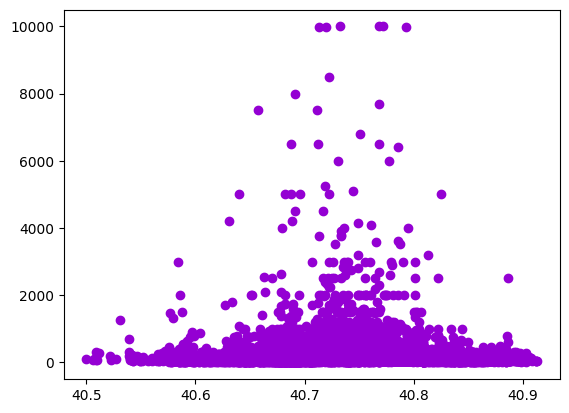

In [11]:
plt.scatter(x= df['latitude'], y = df['price'], color = 'darkviolet')
plt.show()

The number of airbnbs that have a price higher than 2000 per night is very small compared to the amount of airbnbs being considered. Because most of the prices seem to be under 1000 a night, we will repeat the map using a maximum of 500, so that the gradient looks better. 

df2 = df[df['price']< 500]

latmedian = stats.median(df['latitude'])
lonmedian = stats.median(df['longitude'])

colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow'], vmin=0, vmax=500)

m = folium.Map(location=[latmedian, lonmedian], zoom_start=10)

for i in range(len(df2)):
    folium.Circle(
        location=[df2.iloc[i]['latitude'], df2.iloc[i]['longitude']],
        radius=10,
        fill=True,
        color=colormap(df2.iloc[i]['price']),
        fill_opacity=0.2
    ).add_to(m)

m.add_child(colormap)

m

As expected, the most expensive airbnbs are in Manhattan, which is followed by Brooklyn and Queens.

df3 = df[df['price']>500]


colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow'], vmin=500, vmax=10000)

m = folium.Map(location=[latmedian, lonmedian], zoom_start=10)

for i in range(len(df3)):
    folium.Circle(
        location=[df3.iloc[i]['latitude'], df3.iloc[i]['longitude']],
        radius=10,
        fill=True,
        color=colormap(df3.iloc[i]['price']),
        fill_opacity=0.2
    ).add_to(m)

m.add_child(colormap)

m

This map shows the most expensive airbnbs.

Multivariate categorical-categorical analysis:

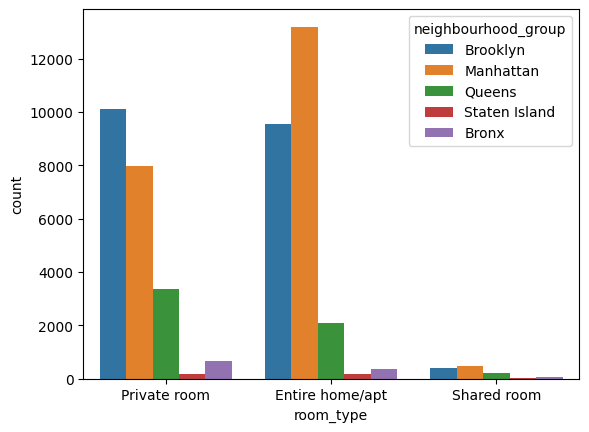

In [49]:

sns.countplot( data = df, x = "room_type", hue = "neighbourhood_group")
plt.show()


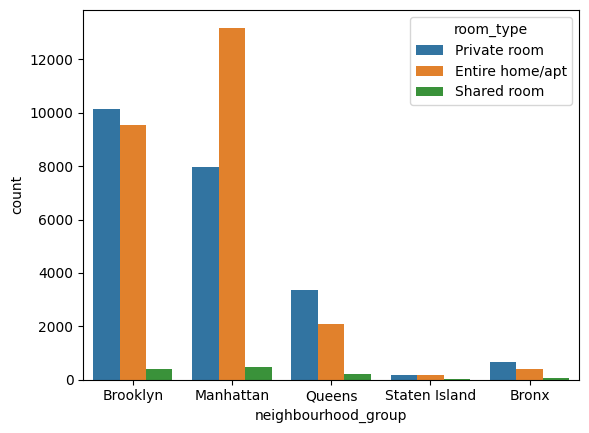

In [39]:

sns.countplot( data = df, x = "neighbourhood_group", hue = "room_type")
plt.show()


In the graph above, we can see the number of airbnbs per naighbourhood group and room type.

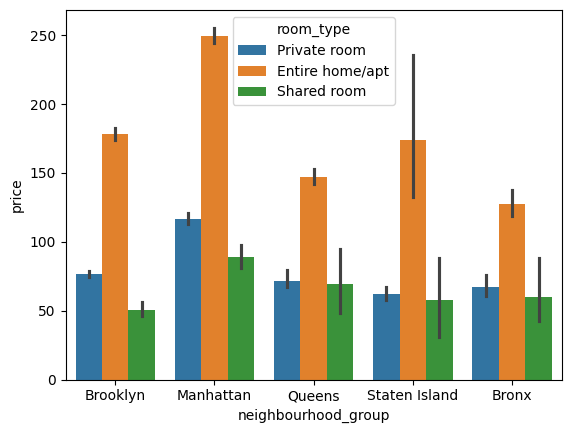

In [40]:
sns.barplot(data = df, x = "neighbourhood_group", y = "price", hue = "room_type")


plt.show()

The graph above shows that the price is, as expected, higher for entire apartments. However, regardless of the type of room, Manhattan is still the most expensive neighbourhood. 

In [41]:

df["neigh_n"] = pd.factorize(df["neighbourhood_group"])[0]
df["room_n"] = pd.factorize(df["room_type"])[0]


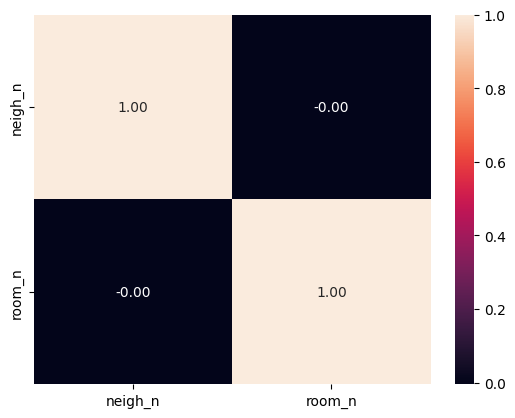

In [42]:
sns.heatmap(df[["neigh_n", "room_n"]].corr(), annot = True, fmt = ".2f")

plt.show()

As expected, there is no relationship between the type of room and the neighbourhood group. 

Multivariate Numerical-categorical analysis

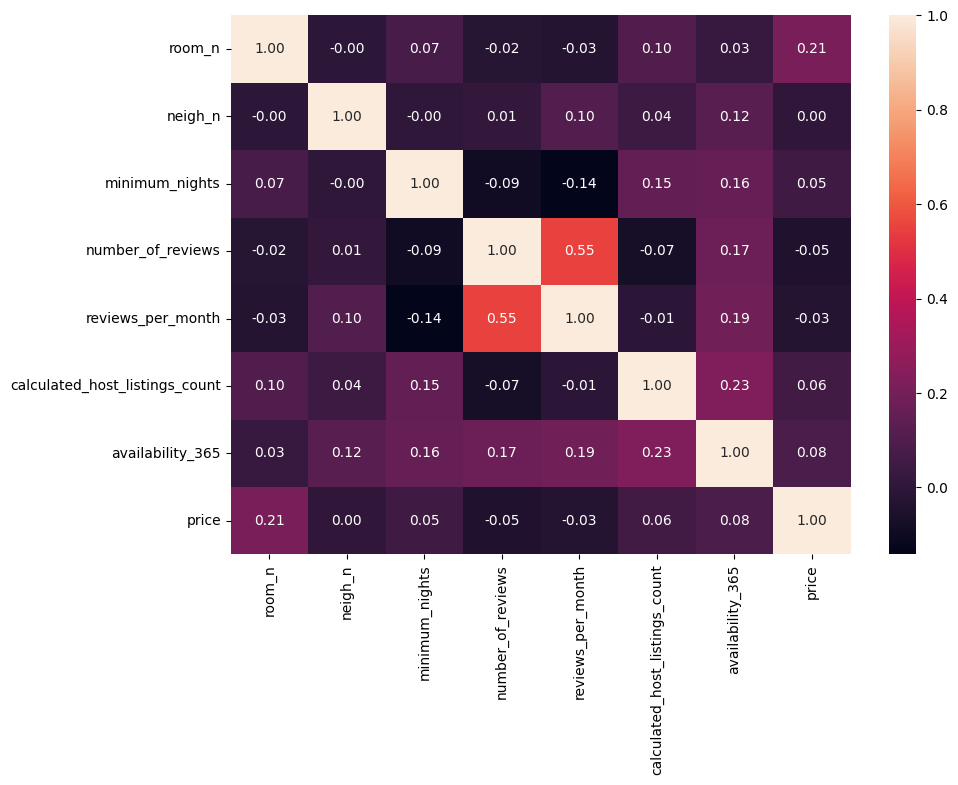

In [43]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(df[["room_n", "neigh_n", 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price']].corr(), annot = True, fmt = ".2f")


plt.show()

sns.pairplot(data = df)

DAY 2:

In [44]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neigh_n,room_n
count,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,38830.000000,48879.000000,48879.000000,48879.000000,48879.000000
mean,40.728951,-73.952173,152.752920,6.923259,23.273799,1.373202,7.145154,112.762741,0.786984,0.567074
std,0.054533,0.046159,240.179476,17.567191,44.553153,1.680428,32.957823,131.617456,0.844321,0.541155
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,40.690095,-73.983075,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000
50%,40.723080,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,1.000000
75%,40.763120,-73.936285,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,1.000000
max,40.913060,-73.712990,10000.000000,500.000000,629.000000,58.500000,327.000000,365.000000,4.000000,2.000000


import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize = (15, 10))
sns.boxplot(ax = axis[0, 0], data = df, y = "room_n")
sns.boxplot(ax = axis[0, 1], data = df, y = "neigh_n")
sns.boxplot(ax = axis[0, 2], data = df, y = "minimum_nights")
sns.boxplot(ax = axis[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 1], data = df, y = "reviews_per_month")
sns.boxplot(ax = axis[1, 2], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 0], data = df, y = "availability_365")
sns.boxplot(ax = axis[2, 1], data = df, y = "price")

plt.tight_layout()

plt.show()

We can see that the variables most affected by the outliers are the following: minimum nights, number of reviews, reviews per month, calculated host listing counts and price. 

In [50]:
df = df.dropna()


In [51]:
price_stats = df["price"].describe()
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers are 321.5 and -82.5, with an interquartile range of 101.0


In [52]:
df = df[df['minimum_nights'] < 999 ]
df = df[df['price'] != 0]

print(df.describe())

           latitude     longitude         price  minimum_nights  \
count  38830.000000  38830.000000  38830.000000    38830.000000   
mean      40.728136    -73.951155    142.356374        5.784368   
std        0.054992      0.046698    196.964867       14.547349   
min       40.506410    -74.244420     10.000000        1.000000   
25%       40.688640    -73.982470     69.000000        1.000000   
50%       40.721720    -73.954810    101.000000        2.000000   
75%       40.762997    -73.935020    170.000000        4.000000   
max       40.913060    -73.712990  10000.000000      500.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       38830.000000       38830.000000                    38830.000000   
mean           29.296935           1.373202                        5.164795   
std            48.189583           1.680428                       26.300033   
min             1.000000           0.010000                        1.000000   
2

In [53]:
from sklearn.preprocessing import StandardScaler

num_variables = ["room_n", "neigh_n", "minimum_nights", "price", "availability_365", "calculated_host_listings_count", "number_of_reviews", 'reviews_per_month', 'latitude', 'longitude']

scaler = StandardScaler()
norm_features = scaler.fit_transform(df[num_variables])

total_data_norm = pd.DataFrame(norm_features, index = df.index, columns = num_variables)
total_data_norm["price"] = df["price"]
total_data_norm.head()

,room_n,neigh_n,minimum_nights,price,availability_365,calculated_host_listings_count,number_of_reviews,reviews_per_month,latitude,longitude
0,-1.054766,-0.912711,-0.328887,149,1.930850,0.031757,-0.421195,-0.692215,-1.466537,-0.454306
1,0.805458,0.260041,-0.328887,225,1.853656,-0.120336,0.325864,-0.591049,0.463414,-0.698431
3,0.805458,-0.912711,-0.328887,89,0.610834,-0.158359,4.994983,1.944052,-0.781880,-0.184270
4,0.805458,0.260041,0.289791,80,-0.886728,-0.158359,-0.421195,-0.757675,1.279729,0.153435
5,0.805458,0.260041,-0.191403,200,0.109073,-0.158359,0.927662,-0.466079,0.355214,-0.510626


In [55]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["room_n", "neigh_n", "minimum_nights", "price", "availability_365", "calculated_host_listings_count", "number_of_reviews", 'reviews_per_month', 'latitude', 'longitude']

scaler = MinMaxScaler()

scal_features = scaler.fit_transform(df[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
total_data_scal["price"] = df["price"]
total_data_scal.head()

,room_n,neigh_n,minimum_nights,price,availability_365,calculated_host_listings_count,number_of_reviews,reviews_per_month,latitude,longitude
0,0.0,0.00,0.000000,149,1.000000,0.015337,0.012739,0.003419,0.346932,0.511921
1,0.5,0.25,0.000000,225,0.972603,0.003067,0.070064,0.006326,0.607918,0.490469
3,0.5,0.00,0.000000,89,0.531507,0.000000,0.428344,0.079159,0.439518,0.535649
4,0.5,0.25,0.018036,80,0.000000,0.000000,0.012739,0.001539,0.718308,0.565324
5,0.5,0.25,0.004008,200,0.353425,0.000000,0.116242,0.009916,0.593287,0.506972


In [56]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("price", axis = 1)
y = total_data_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,room_n,neigh_n,availability_365,calculated_host_listings_count,number_of_reviews
0,0.0,0.00,0.052055,0.000000,0.050955
1,0.5,0.25,0.183562,0.116564,0.014331
2,0.5,0.25,0.090411,0.003067,0.015924
3,0.5,0.25,0.005479,0.000000,0.006369
4,0.0,0.25,0.964384,1.000000,0.019108
